In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [75]:
data_url = 'http://lib.stat.cmu.edu/datasets/boston'

raw_data = pd.read_csv(data_url, sep='\s+',skiprows=22, header=None)


raw_data.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


renaming columns 

In [76]:
raw_data.rename(columns = {0:'CRIM', 1:'land_ZN',2:'INDUS',3:'INDUS',\
                                       4:'NOX',5:'RM',6:'AGE',7:'DIS',8:' RAD',9:'TAX',10:'PTRATIO'}, inplace = True)

In [77]:
raw_data.columns

Index(['CRIM', 'land_ZN', 'INDUS', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', ' RAD',
       'TAX', 'PTRATIO'],
      dtype='object')

In [25]:
# checking the data 
raw_data.shape

(1012, 11)

In [26]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0    CRIM    1012 non-null   float64
 1   land_ZN  1012 non-null   float64
 2   INDUS    1012 non-null   float64
 3   INDUS    506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8    RAD     506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
dtypes: float64(11)
memory usage: 87.1 KB


In [27]:
raw_data.isnull().sum()

 CRIM        0
land_ZN      0
INDUS        0
INDUS      506
NOX        506
RM         506
AGE        506
DIS        506
 RAD       506
TAX        506
PTRATIO    506
dtype: int64

In [51]:
raw_data.dropna(inplace=True)

In [52]:
raw_data.isnull().sum()

 CRIM      0
land_ZN    0
INDUS      0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
 RAD       0
TAX        0
PTRATIO    0
dtype: int64

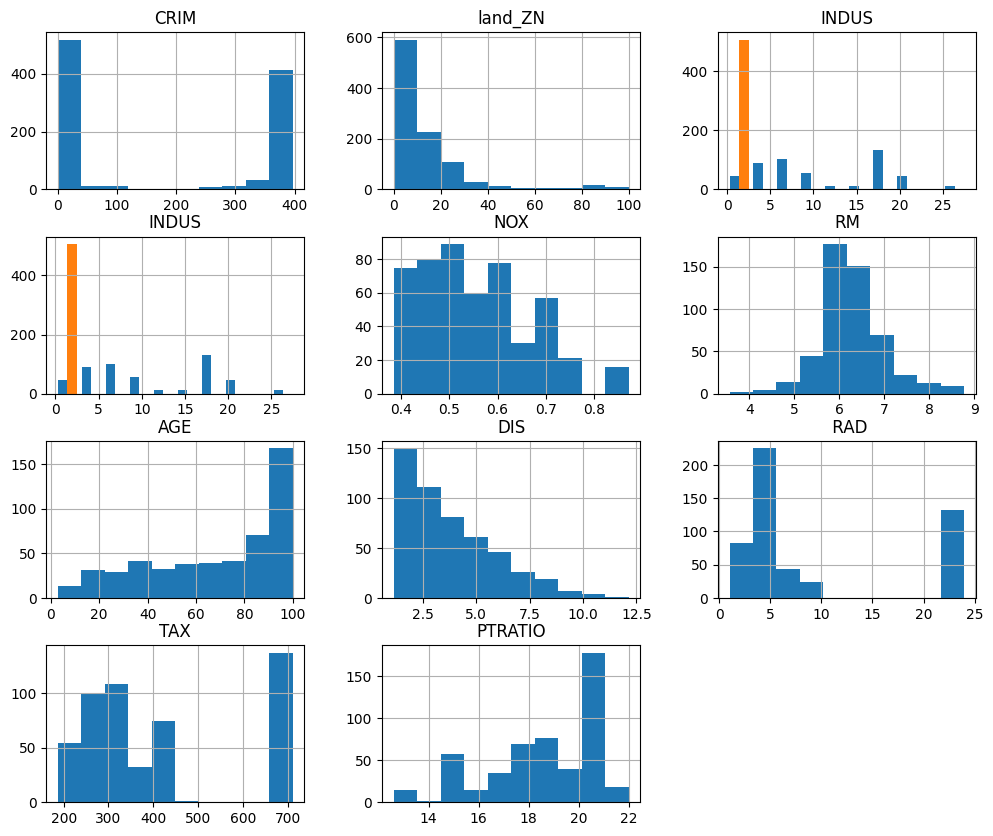

In [85]:
raw_data.hist(figsize=(12, 10))
plt.show()

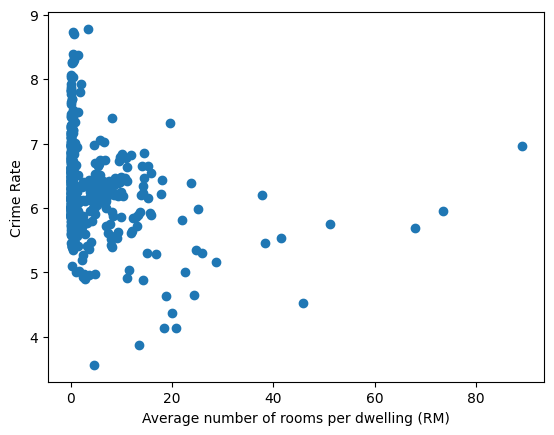

In [80]:
plt.scatter(raw_data['CRIM'], raw_data['RM'])
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Crime Rate')
plt.show()

In [84]:
raw_data.corr()

,CRIM,land_ZN,INDUS,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
CRIM,1.000000,-0.007820,0.621328,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946
land_ZN,-0.007820,1.000000,-0.369513,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679
INDUS,0.621328,-0.369513,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248
INDUS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853


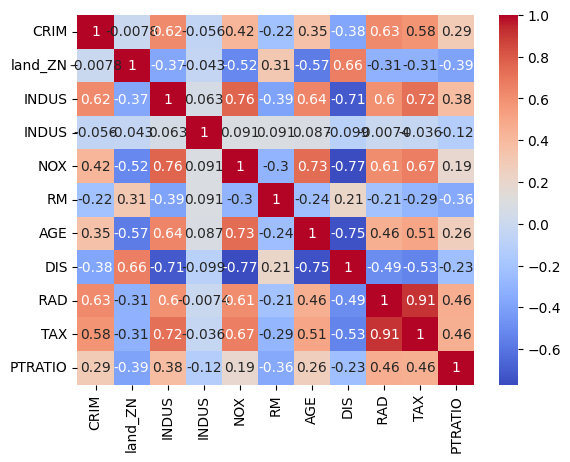

In [82]:

corr_matrix = raw_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()